## Importing libraries and set configurations

In [14]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_excel('Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


## Exploring DataSet

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Number of unique countries

df['Country'].nunique()

38

In [5]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [6]:
# Sort by most expensive products
df.sort_values(by='UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom


In [7]:
# Most purchased Items

df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [8]:
# Unique StockCodes vs Unique Description

print(f"Number of uniques in StockCode: {df['StockCode'].nunique()}")
print(f"Number of uniques in Description:{df['Description'].nunique()}")

Number of uniques in StockCode: 4070
Number of uniques in Description:4223


## Data Preparation

In [9]:
# Checking for null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Dropping null values

df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
# including custom percentiles to better understand value distributions

df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
Quantity,406829.00,12.06,-80995.00,-2.00,1.00,1.00,2.00,5.00,12.00,24.00,36.00,120.00,80995.00,248.69
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 13:07:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-11-20 16:07:00,2011-11-29 15:23:36,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.00,3.46,0.00,0.21,0.42,0.55,1.25,1.95,3.75,6.75,8.50,15.00,38970.00,69.32
CustomerID,406829.00,15287.69,12346.00,12415.00,12626.00,12876.00,13953.00,15152.00,16791.00,17719.00,17905.00,18212.00,18287.00,1713.60


The quantity variable has negative values, which are brought on by refund invoices (invoices that contain the letter "C"), Reassigning the dataset

In [13]:
# Removing negative values

df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [14]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
Quantity,397924.00,13.02,1.00,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.00,120.00,80995.00,180.42
InvoiceDate,397924,2011-07-10 23:43:36.912475648,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 14:39:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-11-21 09:02:00,2011-11-29 15:24:00,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
UnitPrice,397924.00,3.12,0.00,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.50,14.95,8142.75,22.10
CustomerID,397924.00,15294.32,12346.00,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.00,18211.00,18287.00,1713.17


negative values are excluded. We are not removing outliers (such as the max value on Quantity and Price variables) because we will be scoring the dataset.

Creating a new variable named 'Total price' that represents total earnings per invoice (quantity * price)

In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [8]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom,54.08


In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

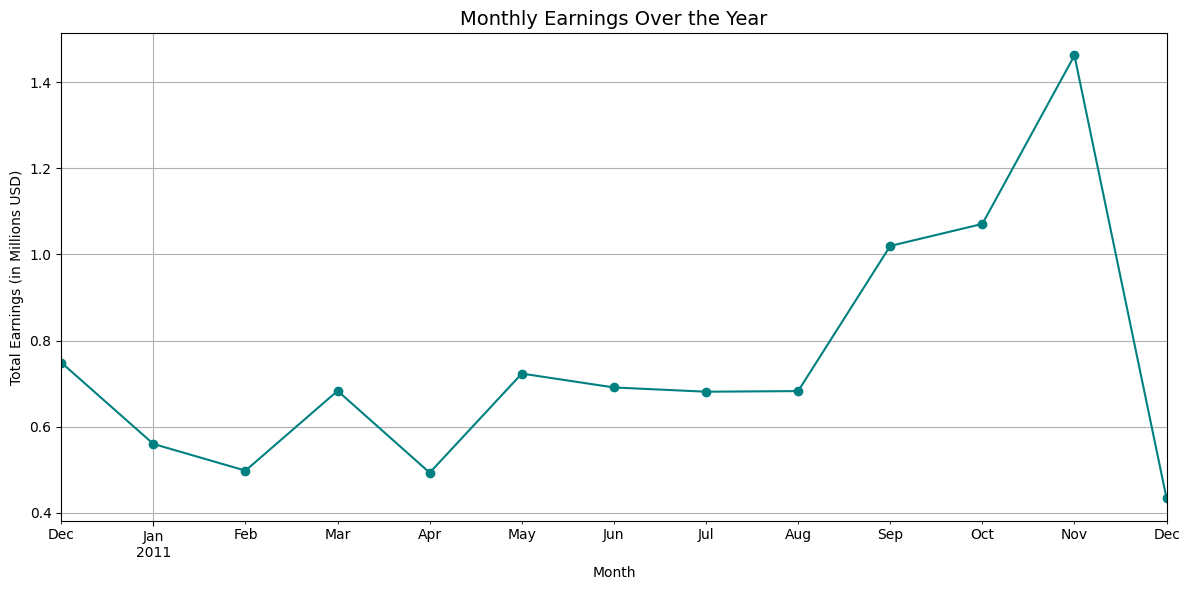

In [24]:
# Extract Month from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and convert TotalPrice to millions
monthly_sales = df.groupby("Month")["TotalPrice"].sum() / 1_000_000  # convert to millions

# Plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="teal")

plt.title("Monthly Earnings Over the Year", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Earnings (in Millions USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


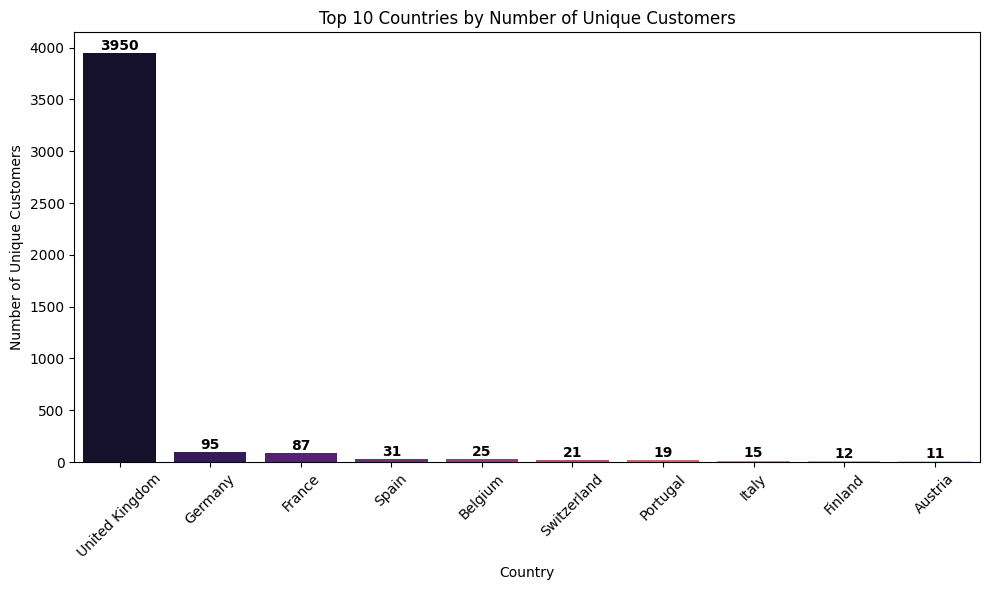

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by unique customers
customer_counts = df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=customer_counts.index, y=customer_counts.values, palette="magma")

# Add count labels on top of each bar
for i, val in enumerate(customer_counts.values):
    ax.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Top 10 Countries by Number of Unique Customers")
plt.xlabel("Country")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


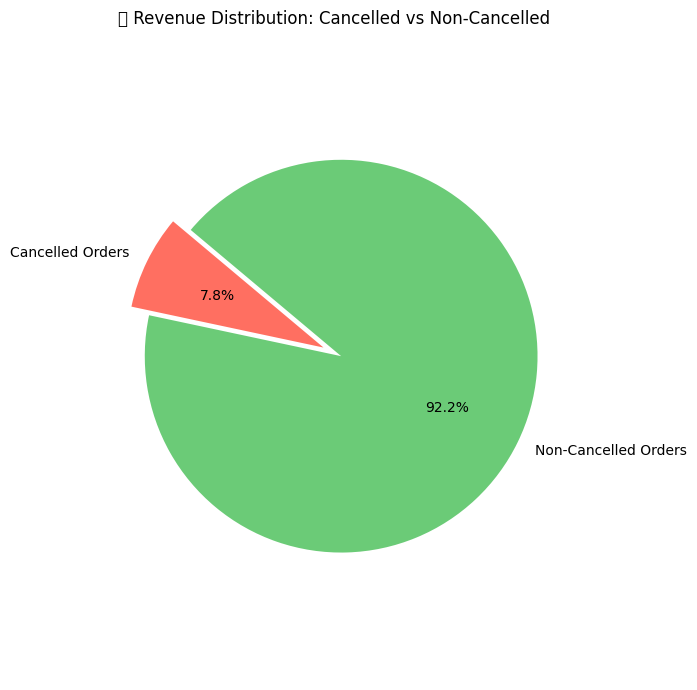

In [35]:
# Mark cancellations
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')

# Compute TotalPrice if not already done
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Split
cancelled_df = df[df['IsCancelled']]
non_cancelled_df = df[~df['IsCancelled']]

# Absolute revenue for pie chart
cancelled_revenue = cancelled_df['TotalPrice'].abs().sum()
non_cancelled_revenue = non_cancelled_df['TotalPrice'].sum()

# Pie data
labels = ['Cancelled Orders', 'Non-Cancelled Orders']
sizes = [cancelled_revenue, non_cancelled_revenue]
colors = ['#FF6F61', '#6BCB77']

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.1, 0]
)
plt.title("📉 Revenue Distribution: Cancelled vs Non-Cancelled")
plt.axis('equal')
plt.tight_layout()
plt.show()


## RFM Metrics

Recency : the number of days between today_date and the last purchase date of this customer

Frequency : the number of purchase of this customer

Monetary : sum of TotalPrice of this customer

In [18]:
# Getting last date of purchase

df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
# make sure that none of the Recency values become zero
import datetime as dt
today_date = dt.datetime(2011, 12, 11)

In [20]:
df['CustomerID'] = df['CustomerID'].astype(int)


In [21]:
# Calculate Recency, Frequency, and Monetary values for each customer

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,    # Recency: days since last purchase
    'InvoiceNo': lambda x: x.nunique(),                      # Frequency: count of unique invoices
    'TotalPrice': lambda x: x.sum()                          # Monetary: total money spent
}).reset_index()

In [22]:
rfm.head(10)

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40
5,12352,37,8,2506.04
6,12353,205,1,89.00
7,12354,233,1,1079.40
8,12355,215,1,459.40
9,12356,23,3,2811.43


In [23]:
# Changing column names

rfm.columns = ['customerid', 'recency', 'frequency', 'monetary']

In [24]:
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,customerid,recency,frequency,monetary
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40


Scoring the values between 1 and 5

In [25]:
# Assign recency scores (1-5) (more recent buyers)
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# Assign frequency scores (1-5) more frequent = higher score
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Assign monetary scores (1-5)  higher spenders = higher score
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single string identifier
rfm["RFM_SCORE"] = (
    rfm['recency_score'].astype(str) +
    rfm['frequency_score'].astype(str)
)

In [28]:
rfm.head()

,customerid,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346,326,1,77183.60,1,1,5,11
1,12347,3,7,4310.00,5,5,5,55
2,12348,76,4,1797.24,2,4,4,24
3,12349,19,1,1757.55,4,1,4,41
4,12350,311,1,334.40,1,1,2,11


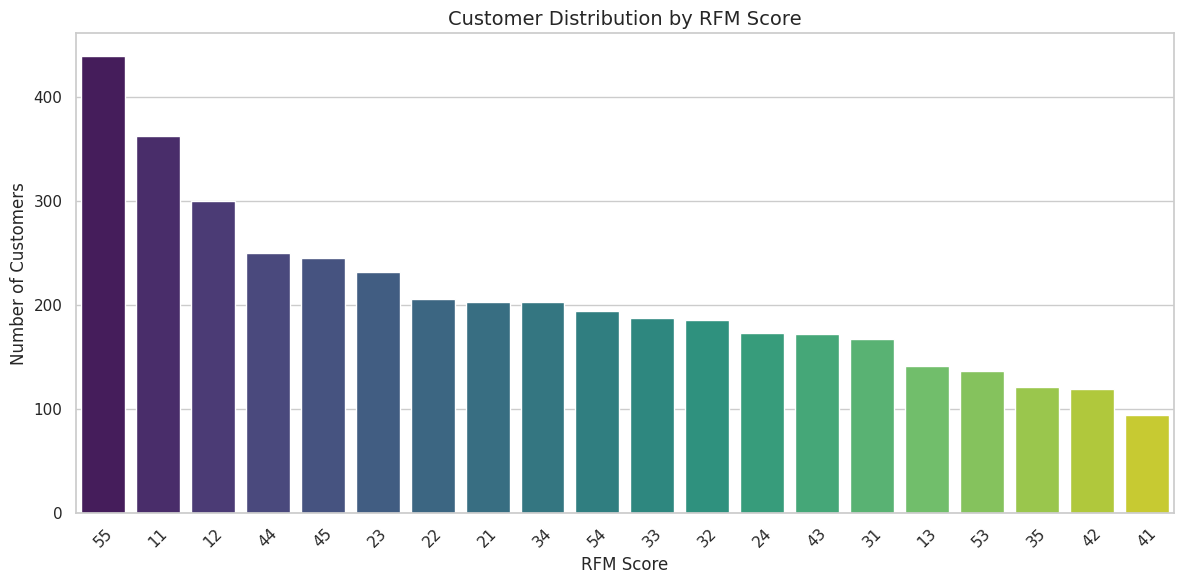

In [ ]:
# RFM Segment Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice Seaborn style
sns.set(style="whitegrid")

# Count of customers per RFM_SCORE (Top 20)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(rfm['RFM_SCORE'].value_counts().index[:20]))  # colorful palette

sns.countplot(
    data=rfm,
    x='RFM_SCORE',
    order=rfm['RFM_SCORE'].value_counts().index[:20],
    palette=colors
)

plt.title('Customer Distribution by RFM Score', fontsize=14)
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

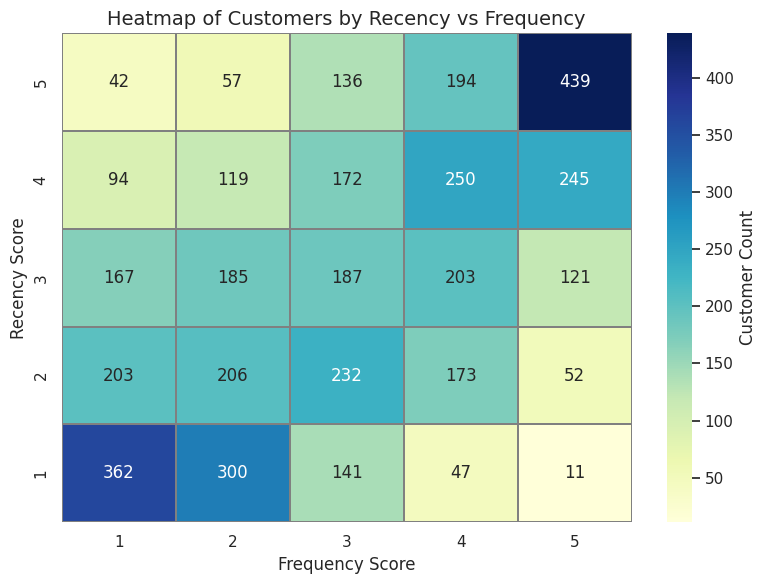

In [ ]:
# Recency vs Frequency

# Pivot table for Recency x Frequency
rfm_pivot = rfm.pivot_table(
    index='recency_score',
    columns='frequency_score',
    values='monetary_score',
    aggfunc='count'
)

# Heatmap with warm gradient and annotations
plt.figure(figsize=(8, 6))
sns.heatmap(
    rfm_pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',  # elegant yellow-green-blue gradient
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Customer Count'}
)

plt.title('Heatmap of Customers by Recency vs Frequency', fontsize=14)
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.tight_layout()
plt.show()


    r'[1-2][1-2]': 'hibernating',           # Low recency & frequency → likely inactive customers
    r'[1-2][3-4]': 'at_Risk',               # Haven't purchased recently but used to be active
    r'[1-2]5': 'cant_loose',                # Previously high-frequency customers, now inactive — critical group
    r'3[1-2]': 'about_to_sleep',            # Moderate activity — may go inactive soon
    r'33': 'need_attention',               # Average all around — could be nurtured
    r'[3-4][4-5]': 'loyal_customers',       # High frequency and moderately recent — regular buyers
    r'41': 'promising',                    # Recent but not yet frequent — potential to grow
    r'51': 'new_customers',               # Very recent first-time buyers
    r'[4-5][2-3]': 'potential_loyalists',   # Decent frequency, not the most recent — show signs of loyalty
    r'5[4-5]': 'champions'                 # Very recent & frequent — your best customers!


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [ ]:
# Map each RFM_SCORE to a customer segment based on regex rules
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [ ]:
# View average RFM values and number of customers per segment
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])
rfm.head()

,customerid,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346,326,1,77183.60,1,1,5,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,champions
2,12348,76,4,1797.24,2,4,4,24,at_Risk
3,12349,19,1,1757.55,4,1,4,41,promising
4,12350,311,1,334.40,1,1,2,11,hibernating


### Anayzing 3 segments:

1. Champions

2. Can't loose

3. Need attention.

In [ ]:
champions = rfm[rfm['segment'] == 'champions']
cant_loose = rfm[rfm['segment'] == 'cant_loose']

In [ ]:
# Filter only 'champions' segment and get mean & count of RFM metrics
rfm[rfm['segment'] == 'champions'][['recency', 'frequency', 'monetary']].agg(['mean', 'count'])

,recency,frequency,monetary
mean,6.36,12.42,6857.94
count,633.00,633.00,633.00


633 clients in the "Champions" section made purchases extremely recently (avg. each 6.36 days ), often (12.42 orders), and with substantial spending (avg. 6857.94).

In [ ]:
cant_loose[['recency','frequency','monetary']].agg(['mean', 'count'])

,recency,frequency,monetary
mean,132.97,8.38,2796.16
count,63.00,63.00,63.00


63 clients in the "can't lose" sector have made large purchases (avg. 8.38 orders) and spent a lot of money (avg. 2796.16) in the past, but they haven't made any purchases recently (avg. recency: 133 days).

In [ ]:
rfm[rfm['segment'] == 'need_attention'][['recency', 'frequency', 'monetary']].agg(['mean', 'count'])

,recency,frequency,monetary
mean,52.43,2.33,897.63
count,187.00,187.00,187.00


187 clients in the "need_attention" group made purchases on average 52 days ago, however they order so seldom (2.33 orders) and moderately (avg. 897.63).

In [ ]:
loyal_df = pd.DataFrame()
loyal_df["loyal_customer_id"] = rfm[rfm["segment"] == "loyal_customers"].index

In [ ]:
loyal_df.head()

,loyal_customer_id
0,5
1,12
2,20
3,29
4,34


In [ ]:
loyal_df.count()

,0
loyal_customer_id,819


Download Excel File

In [ ]:
loyal_df.to_excel("loyal_customers.xlsx", sheet_name='Loyal Customers Index')

##  K-Means Clustering on RFM Data

In [30]:
from sklearn.preprocessing import StandardScaler

# Select RFM features for clustering
rfm_clustering = rfm[['recency', 'frequency', 'monetary']]

# Scale the data to standard normal distribution
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)


In [31]:
rfm_scaled[0]

array([ 2.32938811, -0.42473265,  8.35866818])

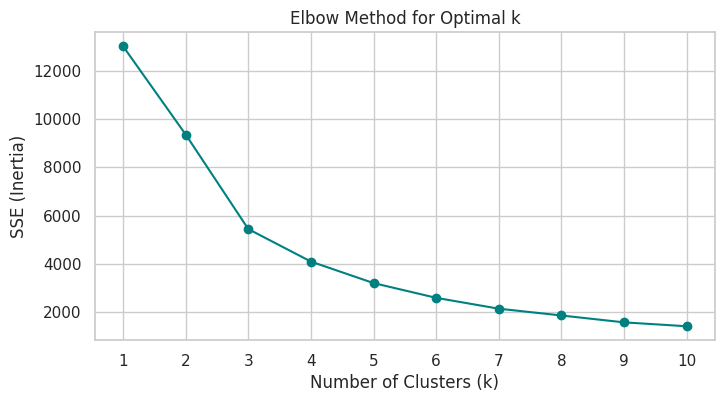

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k (number of clusters)
sse = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    sse.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o', color='teal')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

curve starts to flatten around k = 4

In [111]:
rfm.columns

Index(['customerid', 'recency', 'frequency', 'monetary', 'recency_score',
       'frequency_score', 'monetary_score', 'RFM_SCORE', 'segment'],
      dtype='object')

In [32]:
from sklearn.cluster import KMeans

# Apply KMeans with 4 clusters based on elbow method
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 👀 Preview result with cluster
rfm[['customerid', 'recency', 'frequency', 'monetary', 'Cluster']].head()

,customerid,recency,frequency,monetary,Cluster
0,12346,326,1,77183.60,3
1,12347,3,7,4310.00,0
2,12348,76,4,1797.24,0
3,12349,19,1,1757.55,0
4,12350,311,1,334.40,1


In [46]:
predict_rfm_scaled = scaler.transform([[326, 1, 77183.60]])
#  2.32938811, -0.42473265,  8.35866818])
predict_rfm_scaled

array([[ 2.32938811, -0.42473265,  8.35866818]])

In [34]:
predict_cluster = kmeans.predict(predict_rfm_scaled)
predict_cluster[0]

np.int32(3)

In [35]:
#  Summary statistics by cluster
cluster_statistics = rfm.groupby('Cluster')[['recency', 'frequency', 'monetary']].agg(['mean', 'count'])

In [ ]:
cluster_statistics

recency       frequency        monetary      
           mean count      mean count      mean count
Cluster                                              
0         44.49  3053      3.66  3053   1349.82  3053
1        249.17  1061      1.55  1061    478.19  1061
2          7.62    13     82.69    13 127338.31    13
3         16.12   211     22.05   211  12453.23   211

In [36]:
cluster_statistics.columns = ['_'.join(col) for col in cluster_statistics.columns]
cluster_statistics

,recency_mean,recency_count,frequency_mean,frequency_count,monetary_mean,monetary_count
Cluster,,,,,,
0,44.49,3053,3.66,3053,1349.82,3053
1,249.17,1061,1.55,1061,478.19,1061
2,7.62,13,82.69,13,127338.31,13
3,16.12,211,22.05,211,12453.23,211


In [39]:
cluster_statistics.to_excel("cluster_statistics.xlsx")

In [40]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [41]:
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [50]:

scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")
cluster_summary = pd.read_excel("cluster_statistics.xlsx", index_col=0)

def predict_rfm_cluster(recency, frequency, monetary):
    scaled_values = scaler.transform([[recency, frequency, monetary]])
    
    cluster_label = kmeans.predict(scaled_values)[0]

    row = cluster_summary.loc[cluster_label]
    
    avg_recency = round(row['recency_mean'], 2)
    avg_frequency = round(row['frequency_mean'], 2)
    avg_monetary = round(row['monetary_mean'], 2)
    cluster_size = int(row['recency_count'])  # same as frequency/monetary count

    message = (
        f"You belong to customer segment **#{cluster_label}** where:\n"
        f"- Customers typically purchase every **{avg_recency} days**,\n"
        f"- They shop **{avg_frequency} times**, and\n"
        f"- Spend an average of **${avg_monetary}**.\n\n"
        f"🧑‍🤝‍🧑 Total customers in this segment: **{cluster_size}**."
    )

    return {
        "predicted_cluster": int(cluster_label),
        "cluster_avg_recency": avg_recency,
        "cluster_avg_frequency": avg_frequency,
        "cluster_avg_monetary": avg_monetary,
        "cluster_size": cluster_size,
        "message": message
    }


In [ ]:
result = predict_rfm_cluster(326, 1, 77183.60)
result

{'predicted_cluster': 0,
 'cluster_avg_recency': np.float64(44.49),
 'cluster_avg_frequency': np.float64(3.66),
 'cluster_avg_monetary': np.float64(1349.82),
 'cluster_size': 3053,
 'message': 'You belong to customer segment **#0** where:\n- Customers typically purchase every **44.49 days**,\n- They shop **3.66 times**, and\n- Spend an average of **$1349.82**.\n\n🧑\u200d🤝\u200d🧑 Total customers in this segment: **3053**.'}

In [53]:
print(result["message"])

You belong to customer segment **#0** where:
- Customers typically purchase every **44.49 days**,
- They shop **3.66 times**, and
- Spend an average of **$1349.82**.

🧑‍🤝‍🧑 Total customers in this segment: **3053**.


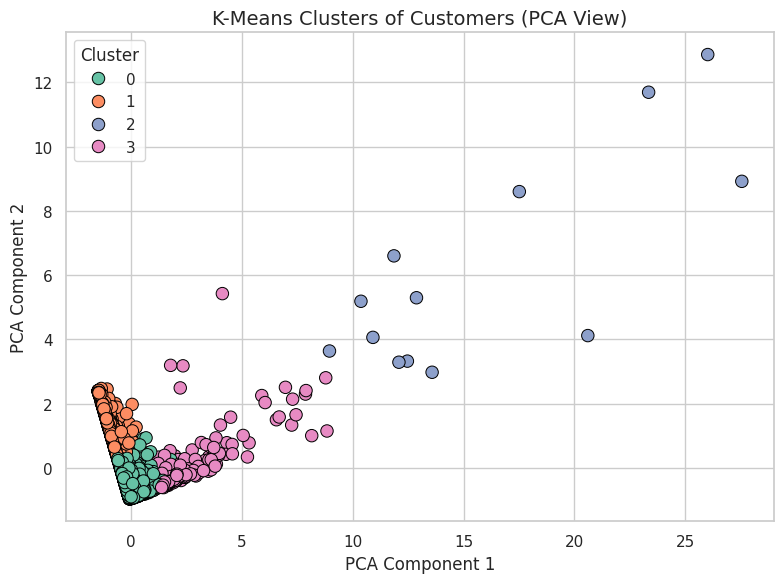

In [117]:
from sklearn.decomposition import PCA

# Reduce RFM features to 2D for plotting
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Add PCA components to rfm
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=80,
    edgecolor='black'
)
plt.title('K-Means Clusters of Customers (PCA View)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [125]:
cluster_counts = rfm['Cluster'].value_counts().sort_index()

# Print numeric values
print("Number of Customers in Each Cluster:")
print(cluster_counts)

Number of Customers in Each Cluster:
Cluster
0    3053
1    1061
2      13
3     211
Name: count, dtype: int64


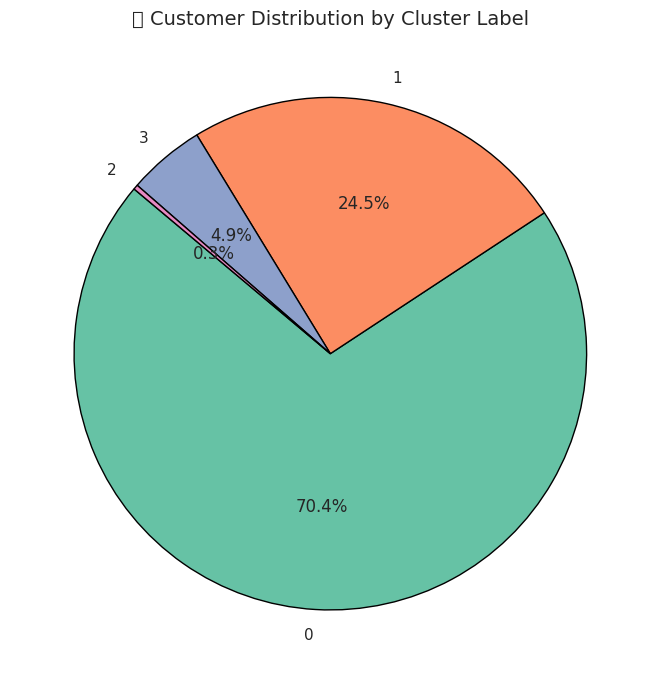

In [120]:
plt.figure(figsize=(7, 7))
rfm['Cluster'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('🧠 Customer Distribution by Cluster Label', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

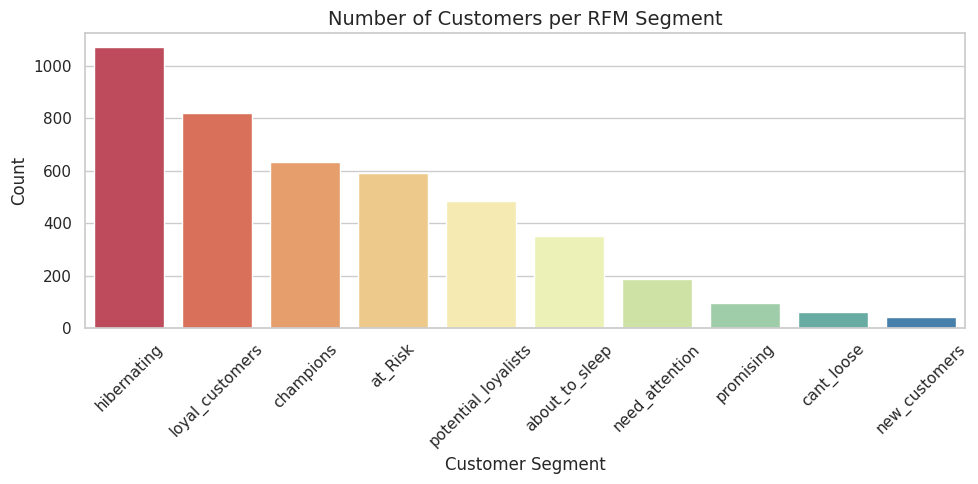

In [121]:
plt.figure(figsize=(10, 5))
segment_order = rfm['segment'].value_counts().index

sns.countplot(data=rfm, x='segment', order=segment_order, palette='Spectral')
plt.title('Number of Customers per RFM Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


complete

In [ ]:
!streamlit run customer-segmentation-app.py